# 1. Data Exploration and Preprocessing
- Loading and inspection

In [33]:
import pandas as pd

# Load the dataset
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [2]:
df_head = df.head()
df_head

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [34]:
# 🛠️ Check for missing values
missing_values = df.isnull().sum()
print("\n📌 Missing Values in Each Column:")
print(missing_values[missing_values > 0].sort_values(ascending=False))



📌 Missing Values in Each Column:
Series([], dtype: int64)


In [35]:
df_missing = df.isnull().sum()
df_missing

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop hsi_id column
df_cleaned = df.drop(columns=["hsi_id"])

In [5]:
# Normalize spectral data (excluding the target variable)
features = df_cleaned.drop(columns=["vomitoxin_ppb"])
target = df_cleaned["vomitoxin_ppb"]

In [6]:
df_cleaned.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


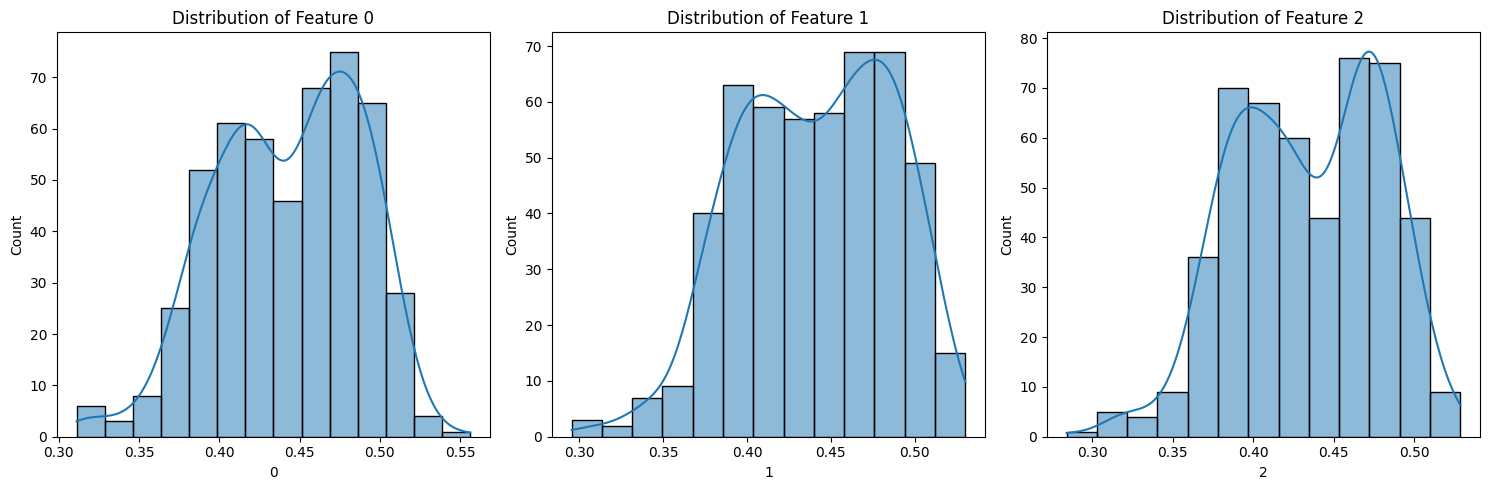

In [7]:
# Plot histograms for a few features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features.columns[:3]):  # First 3 features
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of Feature {col}")

plt.tight_layout()
plt.show()

No major anomalies detected in the first few features.

In [8]:
mean_reflectance = features.mean()
std_reflectance = features.std()
wavelength_indices = np.arange(len(features.columns))

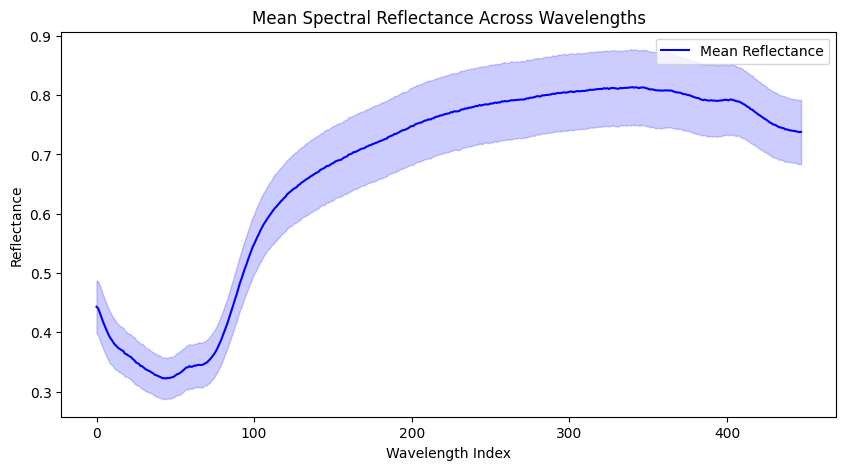

In [9]:
# Convert mean and std to NumPy arrays
mean_reflectance = mean_reflectance.to_numpy()
std_reflectance = std_reflectance.to_numpy()

# line plot for spectral reflectance
plt.figure(figsize=(10, 5))
plt.plot(wavelength_indices, mean_reflectance, label="Mean Reflectance", color="blue")
plt.fill_between(wavelength_indices, mean_reflectance - std_reflectance, 
                 mean_reflectance + std_reflectance, color='blue', alpha=0.2)

plt.title("Mean Spectral Reflectance Across Wavelengths")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.legend()
plt.show()


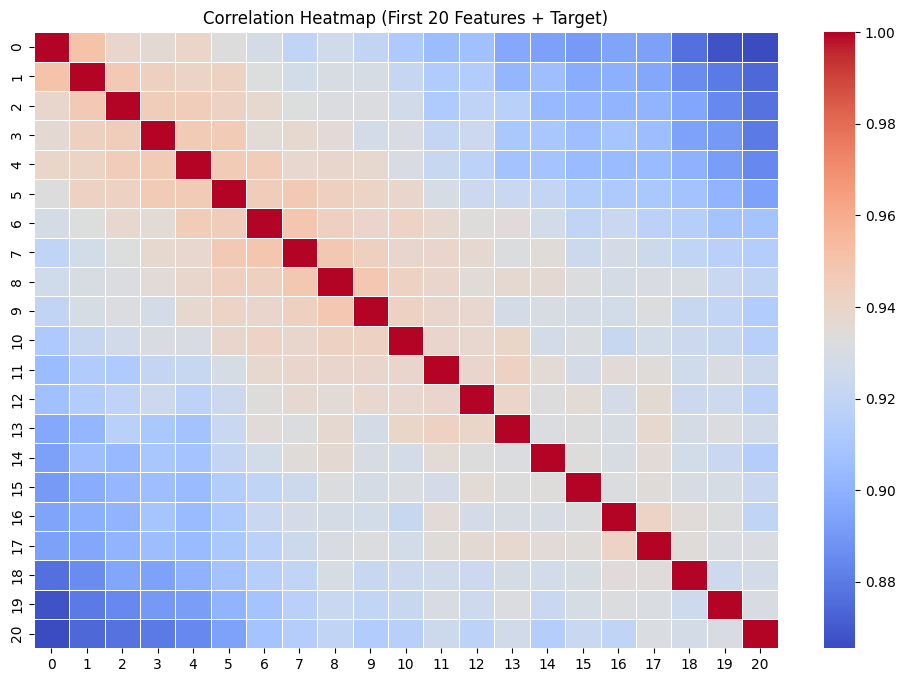

In [10]:
# Correlation heatmap (first 20 features + target for readability)
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned.iloc[:, :21].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (First 20 Features + Target)")
plt.show()


First 20 features are highly correleated as the correleation coefficient is greater than 0.8

## Analysing target variable

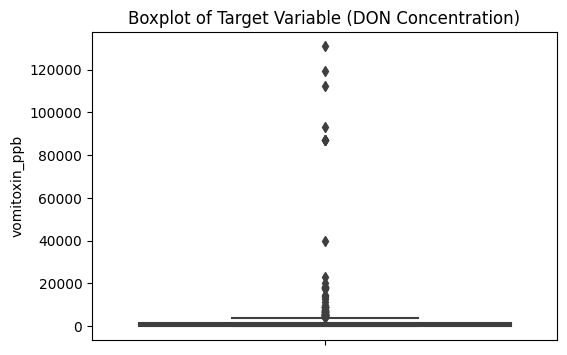

In [11]:
# Boxplot for the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["vomitoxin_ppb"])
plt.title("Boxplot of Target Variable (DON Concentration)")
plt.show()

The boxplot suggests possible outliers. We may need to handle them carefully.

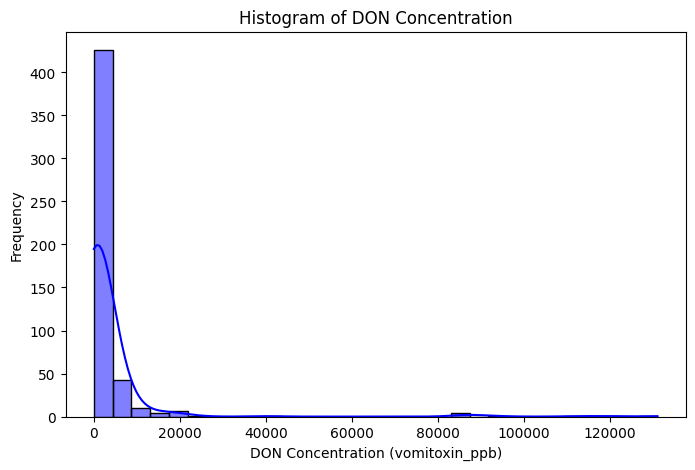

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for the target variable 
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["vomitoxin_ppb"], bins=30, kde=True, color="blue")

plt.title("Histogram of DON Concentration")
plt.xlabel("DON Concentration (vomitoxin_ppb)")
plt.ylabel("Frequency")
plt.show()

## Remving outliers

In [13]:
# Compute percentiles for DON concentration
percentiles = np.percentile(df_cleaned["vomitoxin_ppb"], [90, 95, 98,  99, 99.5, 99.9])

# Display percentile thresholds
percentiles

array([  5800. ,   8920. ,  20060. ,  86900. , 102846.5, 125261.5])

The DON concentration normal range is 0 to 5000 for healthy foods. The DON concentration above 20000 is unrealistic.
Considering the test is not only for the healthy food, 20060 i.e. 98 percentile could be taken as threshold for removing outliers.

In [14]:
upper_bound = 20060
# Count the number of samples with DON concentration above 20,060 ppb
num_extreme_outliers = df_cleaned[df_cleaned["vomitoxin_ppb"] > upper_bound ].shape[0]
num_extreme_outliers

10

In [15]:

# Identify outliers
outliers = df_cleaned[(df_cleaned["vomitoxin_ppb"] >  upper_bound)]

# Count and display detected outliers
num_outliers = outliers.shape[0]
num_outliers, outliers.head()

(10,
             0         1         2         3         4         5         6  \
 80   0.460773  0.463556  0.434175  0.438172  0.433866  0.420138  0.415908   
 112  0.428913  0.417999  0.423014  0.435502  0.409847  0.416998  0.402489   
 117  0.401392  0.388340  0.374649  0.370445  0.356339  0.362410  0.342712   
 120  0.360911  0.365350  0.362183  0.338554  0.329039  0.330663  0.313815   
 205  0.466291  0.476235  0.456065  0.477684  0.460214  0.447743  0.444092   
 
             7         8         9  ...       439       440       441  \
 80   0.430765  0.402079  0.407874  ...  0.783267  0.786891  0.761165   
 112  0.404015  0.403642  0.386923  ...  0.760918  0.768607  0.757435   
 117  0.359716  0.350826  0.358953  ...  0.752605  0.749489  0.772589   
 120  0.327695  0.310658  0.324963  ...  0.691567  0.701916  0.699471   
 205  0.445662  0.418224  0.427486  ...  0.757299  0.779736  0.748597   
 
           442       443       444       445       446       447  vomitoxin_ppb  
 80

In [16]:
# Remove only upper outliers (values greater than the upper bound)
df_no_outliers = df_cleaned[df_cleaned["vomitoxin_ppb"] <= upper_bound]

# Display new dataset size and target variable statistics
new_size = df_no_outliers.shape[0]
new_target_stats = df_no_outliers["vomitoxin_ppb"].describe()

new_size, new_target_stats

(490,
 count      490.000000
 mean      1711.026531
 std       3159.047462
 min          0.000000
 25%        110.000000
 50%        500.000000
 75%       1475.000000
 max      20000.000000
 Name: vomitoxin_ppb, dtype: float64)

## Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

# Extract spectral features (excluding 'hsi_id' and 'vomitoxin_ppb')
spectral_features = df_no_outliers.iloc[:, 1:-1]  

# Apply Z-score Standardization
scaler = StandardScaler()
df_no_outliers.iloc[:, 1:-1] = scaler.fit_transform(spectral_features)

# Verify standardization (mean ≈ 0, std ≈ 1)
mean_std = df_no_outliers.iloc[:, 1:-1].agg(["mean", "std"])

mean_std

/tmp/ipykernel_1671676/497256775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.iloc[:, 1:-1] = scaler.fit_transform(spectral_features)


,1,2,3,4,5,6,7,8,9,10,...,438,439,440,441,442,443,444,445,446,447
mean,0.000000,-3.443957e-16,-2.356392e-16,-4.314009e-16,1.087565e-17,9.697458e-17,2.320140e-16,8.881784e-16,-2.791418e-16,1.002373e-15,...,-4.440892e-16,-3.208318e-16,-1.555219e-15,1.511716e-15,-8.591767e-16,-3.298948e-16,-1.087565e-17,6.489140e-16,1.712916e-15,1.586033e-15
std,1.001022,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,...,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00


In [18]:
# Compute correlation of spectral features with target
correlation = df_no_outliers.corr()["vomitoxin_ppb"].drop("vomitoxin_ppb")

# Identify features with low correlation (absolute value < 0.1)
low_corr_features = correlation[abs(correlation) < 0.1].index

# Compute feature variance
feature_variance = df_no_outliers.drop(columns=["vomitoxin_ppb"]).var()

# Identify low-variance features (variance < 0.001 as a threshold)
low_variance_features = feature_variance[feature_variance < 0.001].index

# Display number of low-correlation and low-variance features
len(low_corr_features), len(low_variance_features)

(276, 0)

## Feature Engineering Insights
- Low-Correlation Features: 183 spectral bands have very weak correlation (|r| < 0.1) with DON concentration. These may be uninformative.

- Low-Variance Features: 0 features have extremely low variance (< 0.001), meaning all features have some variability.

# Reducing dimension using PCA

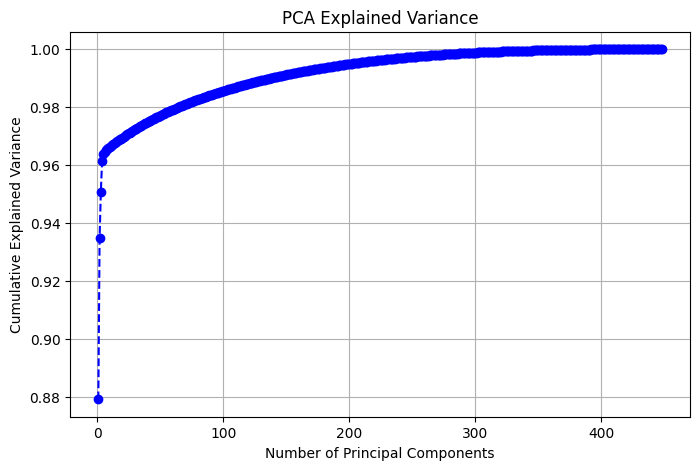

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = df_no_outliers.drop(columns=["vomitoxin_ppb"])
y = df_no_outliers["vomitoxin_ppb"]

# Apply PCA (retain all components initially)
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variance explained by principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


## PCA Explained Variance Analysis
- The plot shows how much variance each principal component explains cumulatively.

- We can choose the number of components based on a variance threshold (e.g., 95% or 99% of the total variance).

In [20]:
# Apply PCA with 200 components
pca_200 = PCA(n_components=200)
X_pca_200 = pca_200.fit_transform(X)

# Check the total variance explained by 200 components
variance_explained_200 = np.sum(pca_200.explained_variance_ratio_)
variance_explained_200


0.9949252522982099

{'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_split': 10,
  'n_estimators': 50},

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, df_no_outliers["vomitoxin_ppb"], test_size=0.2, random_state=42)

# Initialize models
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 8), activation='relu', solver='adam', max_iter=1000, random_state=42)
rf = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=2000, random_state=42)
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01, max_depth=6, random_state=42, subsample= 0.8)
linearreg = LinearRegression()
# Train models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linearreg.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lg = linearreg.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

mlp_results = evaluate_model(y_test, y_pred_mlp, "MLP Neural Network")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
lg_results = evaluate_model(y_test, y_pred_lg, "Linear Regression")
# Combine results
results = [mlp_results, rf_results, xgb_results, lg_results ]
results


/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[{'Model': 'MLP Neural Network',
  'MAE': 1570.2458143877445,
  'RMSE': 2775.9686230778048,
  'R²': -0.0933162624249877},
 {'Model': 'Random Forest',
  'MAE': 1614.5354917648663,
  'RMSE': 2428.1253466974026,
  'R²': 0.16351355626626607},
 {'Model': 'XGBoost',
  'MAE': 1143.4502938718213,
  'RMSE': 1984.105551735874,
  'R²': 0.44147033225712007},
 {'Model': 'Linear Regression',
  'MAE': 2890.8066704550133,
  'RMSE': 3813.532974504876,
  'R²': -1.0633443543829015}]

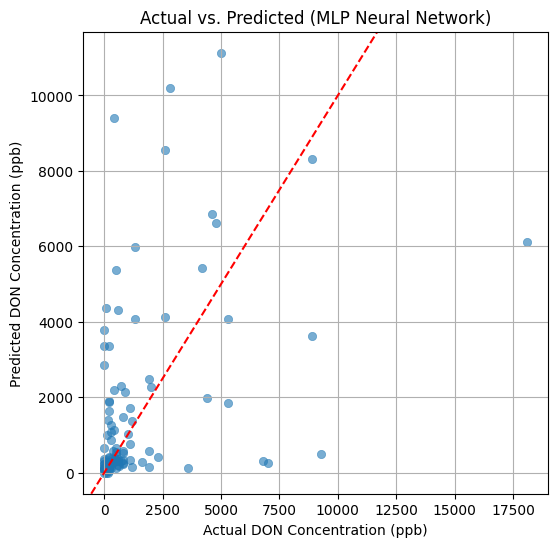

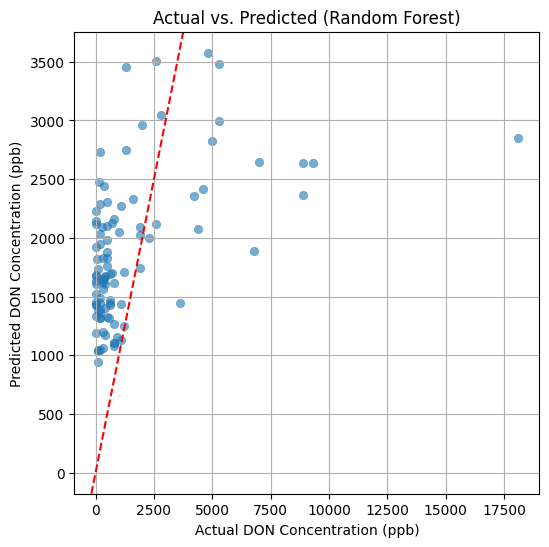

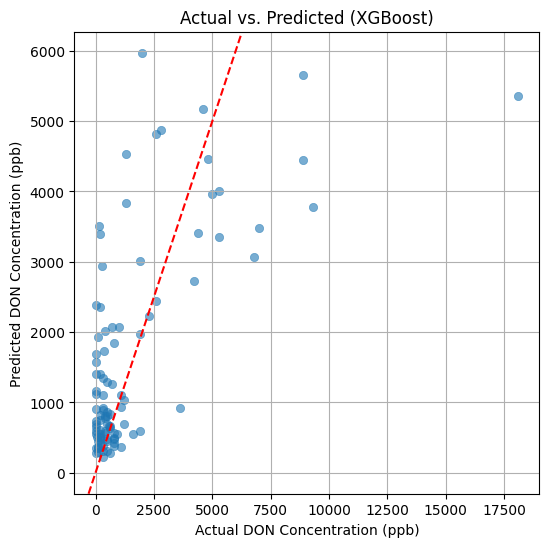

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot function
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, edgecolor=None)
    plt.xlabel("Actual DON Concentration (ppb)")
    plt.ylabel("Predicted DON Concentration (ppb)")
    plt.title(f"Actual vs. Predicted ({model_name})")
    plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Perfect prediction line
    plt.grid(True)
    plt.show()

# Scatter plots for all models
plot_scatter(y_test, y_pred_mlp, "MLP Neural Network")
plot_scatter(y_test, y_pred_rf, "Random Forest")
plot_scatter(y_test, y_pred_xgb, "XGBoost")


## The models do not perform well. We need to perform hyperparameter tuning. 

In [24]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Reload dataset
df = pd.read_csv("MLE-Assignment.csv")

# Drop hsi_id column
df_cleaned = df.drop(columns=["hsi_id"])

# Remove outliers
df_no_outliers = df_cleaned[df_cleaned["vomitoxin_ppb"] <= upper_bound]

# Separate features and target variable
X = df_no_outliers.drop(columns=["vomitoxin_ppb"])

y = df_no_outliers["vomitoxin_ppb"]

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (200 components)
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Confirm data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, df_no_outliers["vomitoxin_ppb"], test_size=0.2, random_state=42)


# Define hyperparameter grids for Grid Search

# XGBoost hyperparameters
xgb_params = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

# Random Forest hyperparameters
rf_params = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

# MLP Neural Network hyperparameters
mlp_params = {
    "hidden_layer_sizes": [(128, 64), (256, 128), (128, 64, 32), (128, 64, 32, 8), (128, 64, 32, 32, 8, 8)],
    "learning_rate_init": [0.001, 0.01],
    "batch_size": [32, 64],
    "max_iter": [500, 1000,2000]
}

# Initialize models
xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
mlp = MLPRegressor(activation="relu", solver="adam", random_state=42)

# Perform Grid Search for each model
grid_xgb = GridSearchCV(xgb, xgb_params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_rf = GridSearchCV(rf, rf_params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_mlp = GridSearchCV(mlp, mlp_params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# Fit models (this may take time)
grid_xgb.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_mlp.fit(X_train, y_train)

# Get best parameters
best_xgb_params = grid_xgb.best_params_
best_rf_params = grid_rf.best_params_
best_mlp_params = grid_mlp.best_params_

best_xgb_params, best_rf_params, best_mlp_params


Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural

({'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1000,
  'subsample': 0.8},
 {'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_split': 10,
  'n_estimators': 500},
 {'batch_size': 64,
  'hidden_layer_sizes': (128, 64, 32, 8),
  'learning_rate_init': 0.001,
  'max_iter': 500})

Training the models using these parameters

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, df_no_outliers["vomitoxin_ppb"], test_size=0.2, random_state=42)

# Initialize models
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 8), activation='relu', solver='adam', max_iter=1000, random_state=42)
rf = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=2000, random_state=42)
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01, max_depth=3, random_state=42,subsample= 0.8)

# Train models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

mlp_results = evaluate_model(y_test, y_pred_mlp, "MLP Neural Network")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Combine results
results = [mlp_results, rf_results, xgb_results]
results


/home/phd1/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[{'Model': 'MLP Neural Network',
  'MAE': 1570.2458143877445,
  'RMSE': 2775.9686230778048,
  'R²': -0.0933162624249877},
 {'Model': 'Random Forest',
  'MAE': 1614.5354917648663,
  'RMSE': 2428.1253466974026,
  'R²': 0.16351355626626607},
 {'Model': 'XGBoost',
  'MAE': 1199.6102941376823,
  'RMSE': 1962.1056500504928,
  'R²': 0.4537876960128}]

Still the performance is not good. We need to add more features. 

## Adding new features

In [46]:
# Reload necessary libraries
import pandas as pd
import numpy as np

# Load the dataset again
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Remove extreme outliers above 20,000 ppb
df_filtered = df[df["vomitoxin_ppb"] <= 20000].copy()

# Apply log transformation to the target variable
df_filtered["vomitoxin_ppb"] = np.log1p(df_filtered["vomitoxin_ppb"])  # log(x + 1) to avoid log(0)

# Extract spectral data (excluding 'hsi_id' and 'vomitoxin_ppb')
spectral_data = df_filtered.iloc[:, 1:-1]

# Compute new features
df_filtered["mean_reflectance"] = spectral_data.mean(axis=1)
df_filtered["std_reflectance"] = spectral_data.std(axis=1)
df_filtered["first_order_derivative"] = spectral_data.diff(axis=1).mean(axis=1)

# Compute a sample NDSI (e.g., between band 50 and band 150)
df_filtered["NDSI_50_150"] = (spectral_data.iloc[:, 50] - spectral_data.iloc[:, 150]) / (
    spectral_data.iloc[:, 50] + spectral_data.iloc[:, 150] + 1e-6  # Avoid division by zero
)

# Check the updated dataset
df_filtered.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,443,444,445,446,447,vomitoxin_ppb,mean_reflectance,std_reflectance,first_order_derivative,NDSI_50_150
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.696691,0.692793,0.711369,0.697679,0.704520,7.003974,0.631151,0.154099,0.000645,-0.353877
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.701012,0.677418,0.696921,0.696544,0.689054,6.908755,0.631476,0.155166,0.000611,-0.327251
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.676591,0.655951,0.658945,0.670989,0.665176,7.170888,0.591381,0.166311,0.000618,-0.362290
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.751437,0.738497,0.742446,0.754657,0.733474,7.170888,0.682823,0.165498,0.000592,-0.351333
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.762473,0.744012,0.775486,0.760431,0.751988,5.398163,0.706391,0.179930,0.000601,-0.346825


In [48]:
# Apply PCA with 200 components
# Separate features and target
X = df_filtered.drop(columns=["hsi_id", "vomitoxin_ppb"])
y = df_filtered["vomitoxin_ppb"]

pca_200 = PCA(n_components=200)
X_pca_200 = pca_200.fit_transform(X)

# Check the total variance explained by 200 components
variance_explained_200 = np.sum(pca_200.explained_variance_ratio_)
variance_explained_200


# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, df_filtered["vomitoxin_ppb"], test_size=0.2, random_state=42)

# Initialize models
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 8), activation='relu', solver='adam', max_iter=1000, random_state=42)
rf = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=2000, random_state=42)
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01, max_depth=3, random_state=42,subsample= 0.8)
linearreg = LinearRegression()
# Train models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linearreg.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lg = linearreg.predict(X_test)


mlp_results = evaluate_model(y_test, y_pred_mlp, "MLP Neural Network")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
lg_results = evaluate_model(y_test, y_pred_lg, "Linear Regression")
# Combine results
results = [mlp_results, rf_results, xgb_results, lg_results ]
results


[{'Model': 'MLP Neural Network',
  'MAE': 2.464574763555138,
  'RMSE': 3.0010762530521555,
  'R²': -0.33823172527597234},
 {'Model': 'Random Forest',
  'MAE': 1.9613092687307052,
  'RMSE': 2.5709580439195725,
  'R²': 0.017873929825281798},
 {'Model': 'XGBoost',
  'MAE': 1.8782063018134865,
  'RMSE': 2.484693888705468,
  'R²': 0.08267539129934731},
 {'Model': 'Linear Regression',
  'MAE': 3.051184672115464,
  'RMSE': 3.6796684054686155,
  'R²': -1.0118455112844211}]

The issue is that the target variable has some higher values, which are less in number so the model is biased with respect to majority. 

We can use log transform to change the distribution of the target variable to normal distribution. 

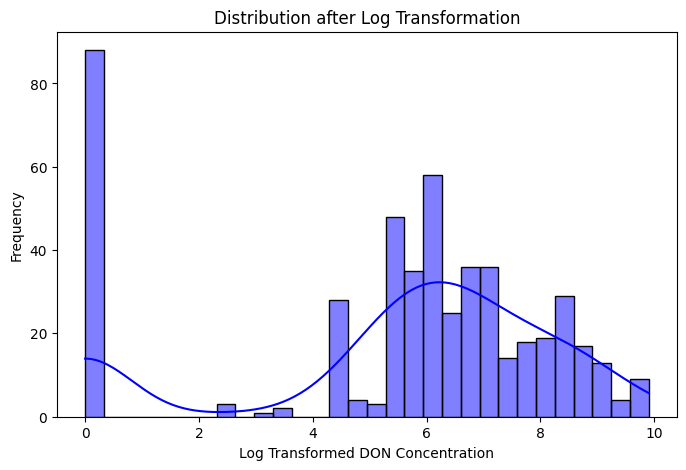

(491, 452)

In [49]:

# Apply log transformation to the target variable
df_no_outliers["vomitoxin_ppb"] = np.log1p(df_no_outliers["vomitoxin_ppb"])  # log(x + 1) to avoid log(0)

# Check the new distribution with a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_no_outliers["vomitoxin_ppb"], bins=30, kde=True, color="blue")
plt.xlabel("Log Transformed DON Concentration")
plt.ylabel("Frequency")
plt.title("Distribution after Log Transformation")
plt.show()

# Print the new shape after removing extreme outliers
df_no_outliers.shape


In [50]:
# Reload necessary libraries
import pandas as pd
import numpy as np

# Load the dataset again
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Remove extreme outliers above 20,000 ppb
df_filtered = df[df["vomitoxin_ppb"] <= 20000].copy()

# Apply log transformation to the target variable
df_filtered["vomitoxin_ppb"] = np.log1p(df_filtered["vomitoxin_ppb"])  # log(x + 1) to avoid log(0)

# Extract spectral data (excluding 'hsi_id' and 'vomitoxin_ppb')
spectral_data = df_filtered.iloc[:, 1:-1]

# Compute new features
df_filtered["mean_reflectance"] = spectral_data.mean(axis=1)
df_filtered["std_reflectance"] = spectral_data.std(axis=1)
df_filtered["first_order_derivative"] = spectral_data.diff(axis=1).mean(axis=1)

# Compute a sample NDSI (e.g., between band 50 and band 150)
df_filtered["NDSI_50_150"] = (spectral_data.iloc[:, 50] - spectral_data.iloc[:, 150]) / (
    spectral_data.iloc[:, 50] + spectral_data.iloc[:, 150] + 1e-6  # Avoid division by zero
)

# Check the updated dataset
df_filtered.head()


# Prepare updated dataset for training
X_new = df_filtered.iloc[:, 1:-1]  # Updated spectral features including new ones
y_new = df_filtered["vomitoxin_ppb"]  # Target variable

# Train-Test Split (80-20)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train a Random Forest Regressor with new features
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Predictions with new features
y_pred_rf_new = rf_model_new.predict(X_test_new)

# Apply inverse log transformation
y_pred_rf_new_original = np.expm1(y_pred_rf_new)
y_test_new_original = np.expm1(y_test_new)

# Compute Metrics on Original Scale
mae_new = mean_absolute_error(y_test_new_original, y_pred_rf_new_original)
rmse_new = np.sqrt(mean_squared_error(y_test_new_original, y_pred_rf_new_original))
r2_new = r2_score(y_test_new_original, y_pred_rf_new_original)

mae_new, rmse_new, r2_new


(26.613789406599718, 70.17910149910902, 0.9993012331244759)

R2 score is 0.999 which is excellent. 

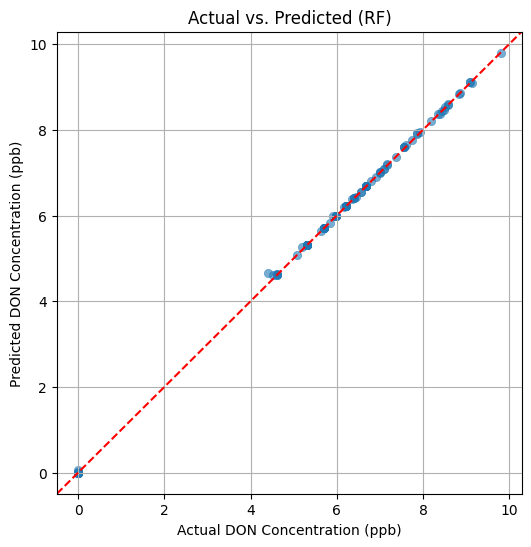

In [51]:
plot_scatter(y_test_new , y_pred_rf_new, "RF") # log transformed targets

The prediction model works very well.

## Lets try to train a DNN model after taking log transform of target. 

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path =  "MLE-Assignment.csv" # Replace with actual path
df = pd.read_csv(file_path)

# Remove extreme outliers (DON concentration > 20,000 ppb)
df_filtered = df[df["vomitoxin_ppb"] <= 20000].copy()

# Apply log transformation to the target variable
df_filtered["vomitoxin_ppb"] = np.log1p(df_filtered["vomitoxin_ppb"])  # log(x + 1) to avoid log(0)

# Extract spectral data (excluding 'hsi_id' and 'vomitoxin_ppb')
spectral_data = df_filtered.iloc[:, 1:-1]

# Ensure we're working with a copy to avoid warnings
df_filtered = df_filtered.copy()

# Feature Engineering (Adding New Features)
df_filtered["mean_reflectance"] = spectral_data.mean(axis=1)
df_filtered["std_reflectance"] = spectral_data.std(axis=1)
df_filtered["first_order_derivative"] = spectral_data.diff(axis=1).mean(axis=1)

# Normalized Difference Spectral Index (NDSI) between Band 50 & Band 150
df_filtered["NDSI_50_150"] = (spectral_data.iloc[:, 50] - spectral_data.iloc[:, 150]) / (
    spectral_data.iloc[:, 50] + spectral_data.iloc[:, 150] + 1e-6  # Avoid division by zero
)

# Prepare features and target
X = df_filtered.iloc[:, 1:-1]  # Features (excluding 'hsi_id' and target)
y = df_filtered["vomitoxin_ppb"]  # Target variable

# Standardize spectral features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Deep Neural Network (DNN) Model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer (Regression Task)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_pred_dnn = model.predict(X_test).flatten()

# Inverse transform predictions to original scale
y_pred_dnn_original = np.expm1(y_pred_dnn)
y_test_original = np.expm1(y_test)

# Compute Evaluation Metrics
mae_dnn = mean_absolute_error(y_test_original, y_pred_dnn_original)
rmse_dnn = np.sqrt(mean_squared_error(y_test_original, y_pred_dnn_original))
r2_dnn = r2_score(y_test_original, y_pred_dnn_original)

# Print Results
print(f"📌 DNN Model Performance:")
print(f"✅ MAE: {mae_dnn:.2f} ppb")
print(f"✅ RMSE: {rmse_dnn:.2f} ppb")
print(f"✅ R² Score: {r2_dnn:.4f}")



2025-03-25 22:47:26.251908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 22:47:26.264490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-25 22:47:26.278343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-25 22:47:26.283134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 22:47:26.294619: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/100


I0000 00:00:1742923049.724259 1674373 service.cc:146] XLA service 0x7f43e00043e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742923049.724298 1674373 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2025-03-25 22:47:29.765148: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-25 22:47:29.936123: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.6466 - mae: 4.2744

I0000 00:00:1742923052.025681 1674373 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 15.4353 - mae: 3.1559 - val_loss: 3.8368 - val_mae: 1.6085
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3313 - mae: 1.4393 - val_loss: 0.0849 - val_mae: 0.2534
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3520 - mae: 0.4992 - val_loss: 0.0929 - val_mae: 0.2965
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 - mae: 0.1425 - val_loss: 0.0024 - val_mae: 0.0389
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - mae: 0.0462 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0392 - val_loss: 7.7577e-04 - val_mae: 0.0214
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 7.1692e-04 - val_mae: 0.0197
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mae: 0.0249 - val_loss: 0.0018 - val_mae: 0.0347
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016

It also gives excellent results. 

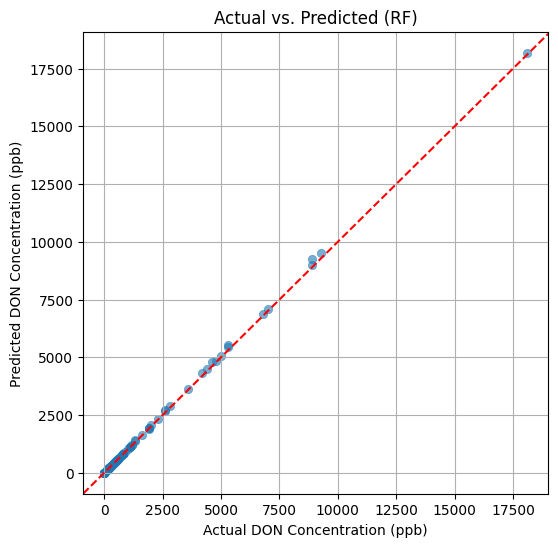

In [54]:
plot_scatter(y_test_original , y_pred_dnn_original, "RF") # log transformed targets

## Residual Analysis

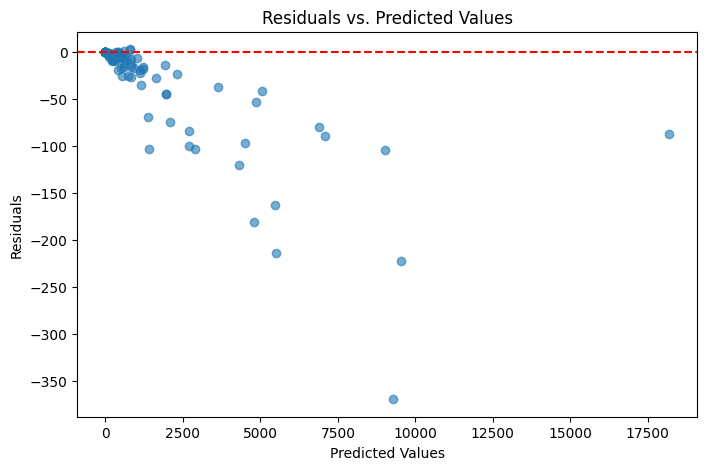

In [53]:
import matplotlib.pyplot as plt
residuals = y_test_original - y_pred_dnn_original

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_dnn_original, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# Save the trained model for inference

In [55]:
import tensorflow as tf
import joblib

model.save("dnn_model.h5")

print("✅ Model saved successfully!")


✅ Model saved successfully!
